# Reservoir Simulation Gridding

In [1]:
import resimpy as sim
import numpy as np 
from shapely.geometry import Point
from scipy import stats

## Cartesian Grid

Create a simple Cartesian grid 3x3x3 with some spatial properties

In [2]:
phi = stats.norm.rvs(loc=0.16, scale=0.04, size=27, random_state=21)
perm = stats.lognorm.rvs(1,scale=550, size=27, random_state=21)

In [3]:
ct=sim.Grid( 
    grid_type='cartesian',
    nx = 3,
    ny = 3,
    nz = 3,
    dx = 100,
    dy = 100,
    dz=  50,
    tops = 8000,
    origin = Point(100,100,-5000),
    spatial_data = {'PORO':phi.tolist(),'PERMX':perm.tolist(), 'PERMY':perm.tolist(),'PERMZ':(perm*0.1).tolist()},
    azimuth=0,
    dip=0
)

/home/scuervo/Documents/dev/apps/resimpy/resimpy/grid.py:915: UserWarning: VTK 9 no longer accepts an offset array
  grid = pv.UnstructuredGrid(offset, cells, cell_type, points)


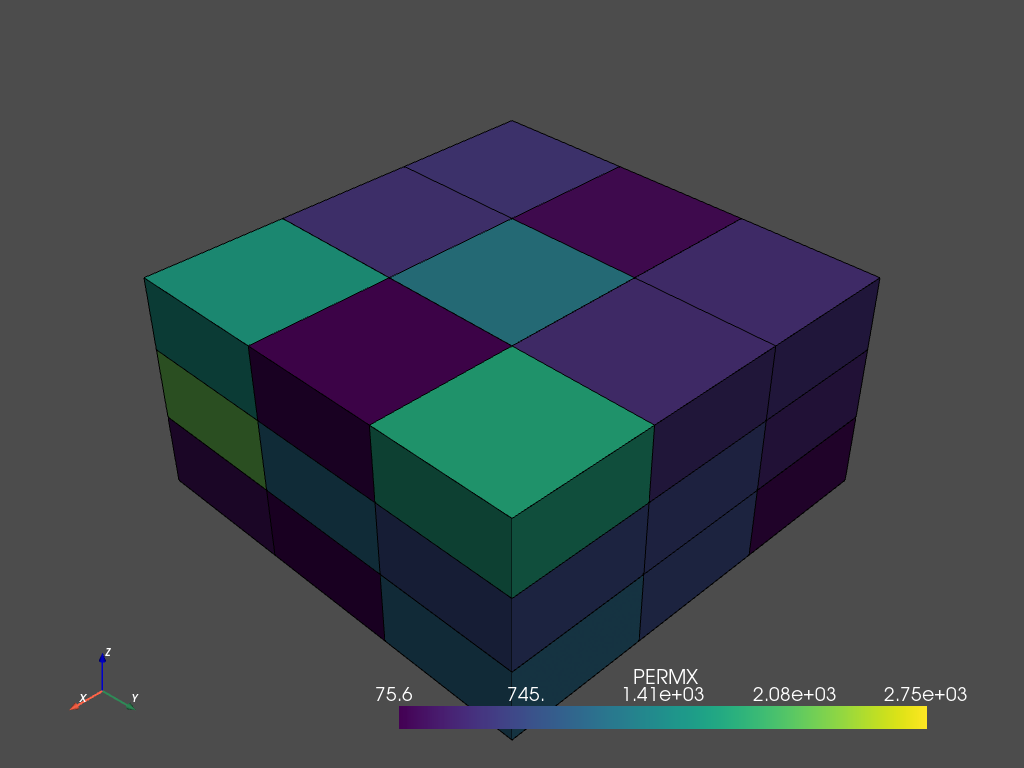

[(751.9097822426849, 751.9097822426849, -4573.090217757315),
 (250.0, 250.0, -5075.0),
 (0.0, 0.0, 1.0)]

In [4]:
ct.get_vtk().plot(scalars='PERMX',show_edges=True)

## Corner Point Grid

To make a Corner Point Grid, you need to provide the parameters coord and zcorn

In [5]:
cord = np.array([
    0,0,0,0,0,10,
    3,0,0,3,0,10,
    6,0,0,6,0,10,
    9,0,0,9,0,10,
    0,3,0,0,3,10,
    3,3,0,3,3,10,
    6,3,0,6,3,10,
    9,3,0,9,3,10,
    0,6,0,0,6,10,
    3,6,0,3,6,10,
    6,6,0,6,6,10,
    9,6,0,9,6,10,
    0,9,0,0,9,10,
    3,9,0,3,9,10,
    6,9,0,6,9,10,
    9,9,0,9,9,10
]).tolist()

zcorn = np.array([
    [0]*36 + 
    [3]*72 +
    [6]*72 +
    [9]*36
]).flatten(order='F').tolist()

In [6]:

cp =sim.Grid(
    grid_type='corner_point',
    nx = 3,
    ny = 3,
    nz = 3,
    coord = cord,
    zcorn = zcorn,
    spatial_data = {'PORO':phi.tolist(),'PERMX':perm.tolist(), 'PERMY':perm.tolist(),'PERMZ':(perm*0.1).tolist()}
)

/home/scuervo/Documents/dev/apps/resimpy/resimpy/grid.py:915: UserWarning: VTK 9 no longer accepts an offset array
  grid = pv.UnstructuredGrid(offset, cells, cell_type, points)


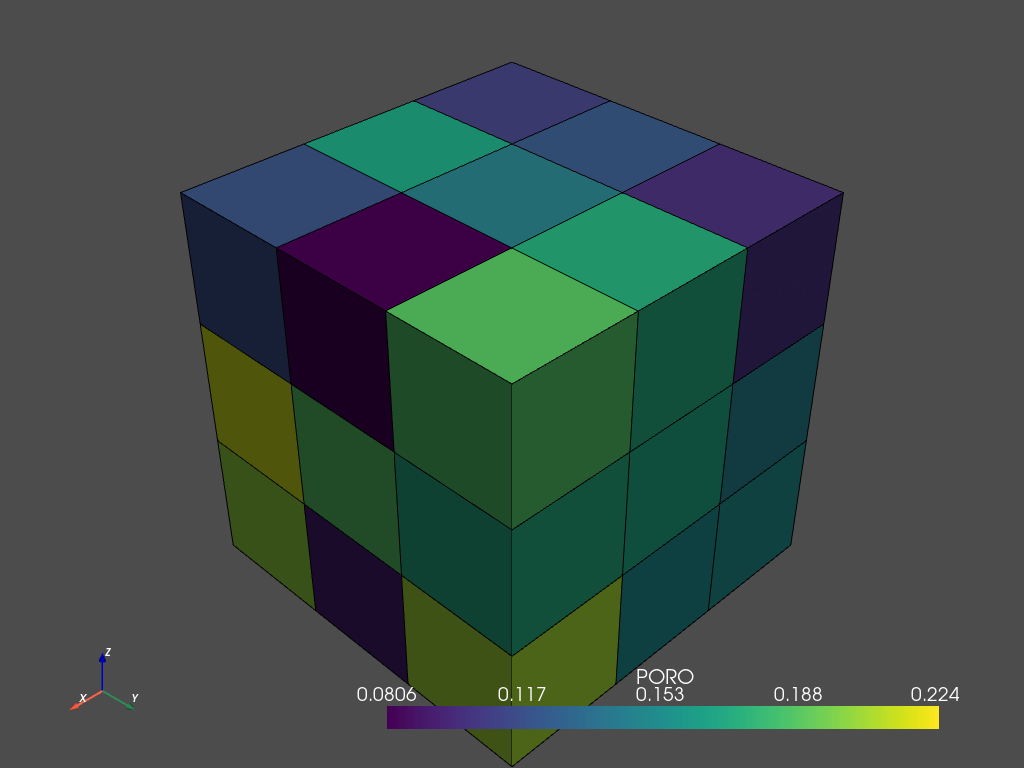

[(21.886664873203234, 21.886664873203234, 21.886664873203234),
 (4.5, 4.5, 4.5),
 (0.0, 0.0, 1.0)]

In [7]:
cp.get_vtk().plot(scalars='PORO',show_edges=True)

A `Grid` instance have some useful methods to extract information about cells and vertices

In [8]:
# Get cell id
cells = [
    [0,0,0],
    [1,0,0],
    [2,2,0],
    [2,2,2]
]

for i in cells:
    print(cp.get_cell_id(*i))



0
1
8
26


In [9]:
# Get cell coord
cells = [0,1,8,26]

for i in cells:
    print(cp.get_cell_ijk(i))

(0, 0, 0)
(1, 0, 0)
(2, 2, 0)
(2, 2, 2)


In [10]:
cp.get_pillar(2)

array([[ 6.,  0.,  0.],
       [ 6.,  0., 10.]])

In [11]:
cp.get_cell_pillars(1,0)

array([[[ 3.,  0.,  0.],
        [ 3.,  0., 10.]],

       [[ 6.,  0.,  0.],
        [ 6.,  0., 10.]],

       [[ 3.,  3.,  0.],
        [ 3.,  3., 10.]],

       [[ 6.,  3.,  0.],
        [ 6.,  3., 10.]]])

In [13]:
cp.get_vertices_id(1,0,0)

array([ 2,  3,  8,  9, 38, 39, 44, 45])

In [15]:
cp.get_vertices_coords(0,0,0)

array([[0., 0., 0.],
       [3., 0., 0.],
       [0., 3., 0.],
       [3., 3., 0.],
       [0., 0., 3.],
       [3., 0., 3.],
       [0., 3., 3.],
       [3., 3., 3.]])

In [30]:
for f in ['X-','X+','Y-','Y+','Z+','Z-']:
    print(cp.get_vertices_face_z(0,0,0, face=f))

[0. 0. 3. 3.]
[0. 0. 3. 3.]
[0. 0. 3. 3.]
[0. 0. 3. 3.]
[0. 0. 0. 0.]
[3. 3. 3. 3.]


In [28]:
for f in ['X-','X+','Y-','Y+','Z+','Z-']:
    print(cp.get_vertices_face_coords(0,0,0, face=f))

[[0. 0. 0.]
 [0. 3. 0.]
 [0. 0. 3.]
 [0. 3. 3.]]
[[3. 0. 0.]
 [3. 3. 0.]
 [3. 0. 3.]
 [3. 3. 3.]]
[[0. 0. 0.]
 [3. 0. 0.]
 [0. 0. 3.]
 [3. 0. 3.]]
[[0. 3. 0.]
 [3. 3. 0.]
 [0. 3. 3.]
 [3. 3. 3.]]
[[0. 0. 0.]
 [3. 0. 0.]
 [0. 3. 0.]
 [3. 3. 0.]]
[[0. 0. 3.]
 [3. 0. 3.]
 [0. 3. 3.]
 [3. 3. 3.]]


In [26]:
cp.get_center_coord(0,0,0)

array([1.5, 1.5, 1.5])

In [ ]:
s = cp.to_ecl(return_string=True, save_file=False)
print(s)